In [4]:
#Importing part

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [6]:
train = pd.read_csv("E:\Kaiwalya\Courses\CodeQuest\Machine Learning using python material\Data sets\Train_SU63ISt.csv")
test = pd.read_csv("E:\Kaiwalya\Courses\CodeQuest\Machine Learning using python material\Data sets\Test_0qrQsBZ.csv")
train.head()


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [7]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [8]:
train_original = train.copy()
test_original = test.copy()

In [9]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [10]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

In [11]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [12]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')

train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')

In [13]:
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [16]:
train['Day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

No handles with labels found to put in legend.


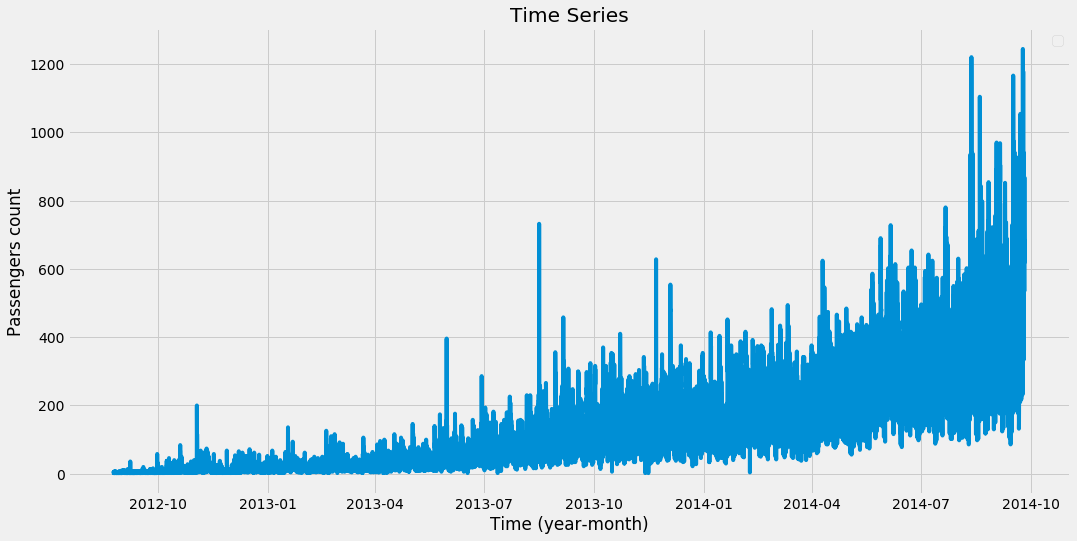

In [17]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Passengers count")
plt.legend(loc = 'best')

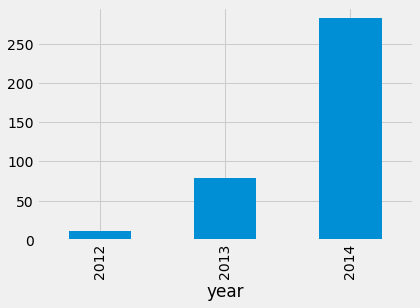

In [18]:
train.groupby('year')['Count'].mean().plot.bar()

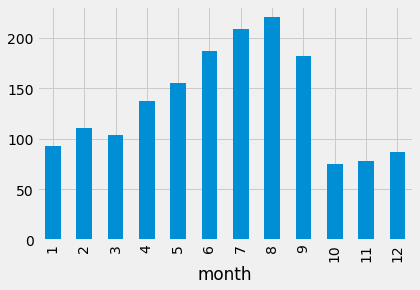

In [19]:
train.groupby('month')['Count'].mean().plot.bar()

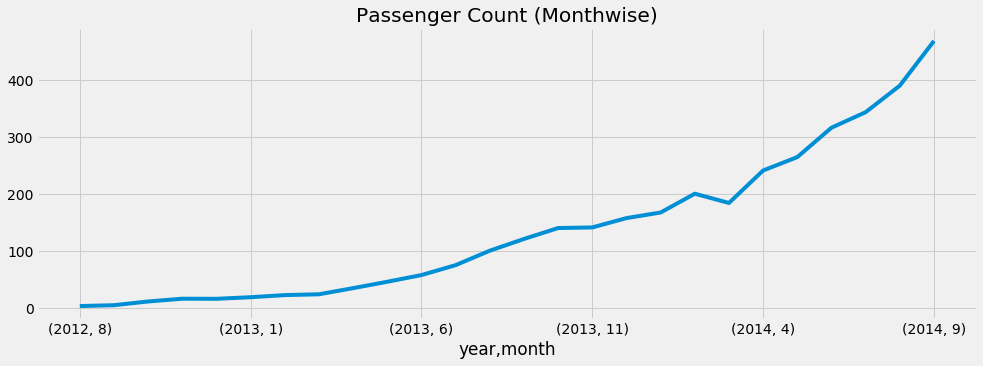

In [24]:
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize = (15,5), title = "Passenger Count (Monthwise)", fontsize = 14)

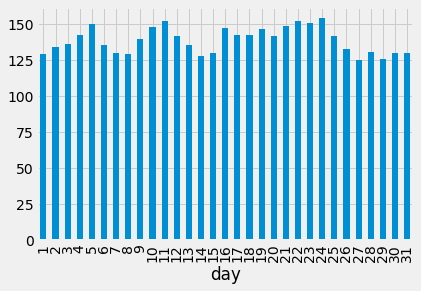

In [27]:
train.groupby('day')['Count'].mean().plot.bar()

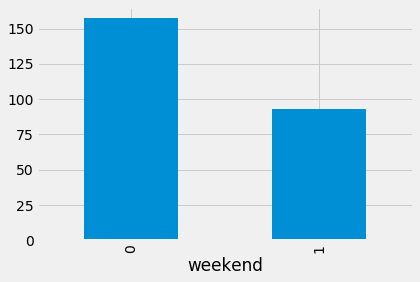

In [28]:
train.groupby('weekend')['Count'].mean().plot.bar()

In [32]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%y %H:%M')
train.index = train.Timestamp
#Hourly
hourly = train.resample('H').mean()

#Daily
daily = train.resample('D').mean()

#Weekly
weekly = train.resample('W').mean()

#Monthly
monthly = train.resample('M').mean()

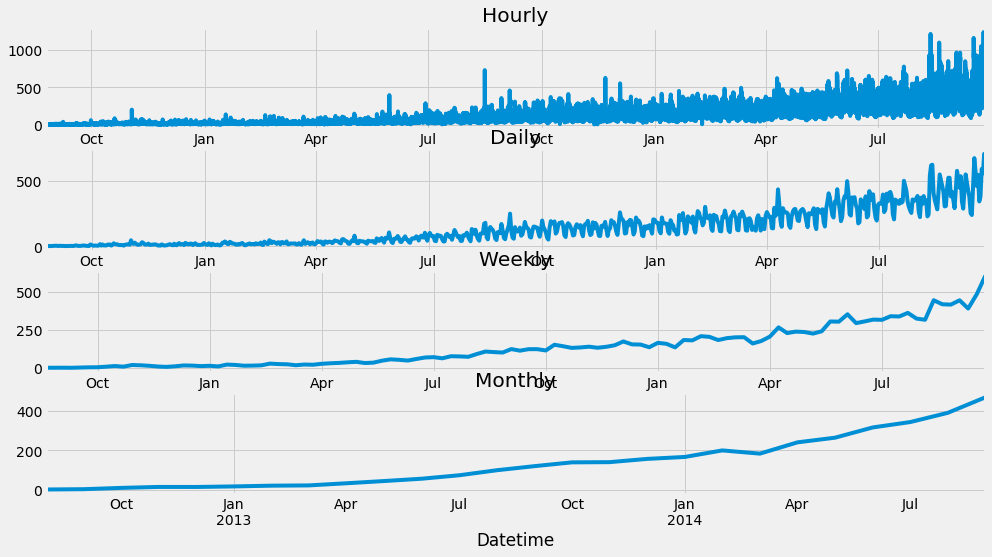

In [34]:
fix, axs = plt.subplots(4, 1)

hourly.Count.plot(figsize = (15, 8), title="Hourly", fontsize = 14, ax =axs[0])
daily.Count.plot(figsize = (15, 8), title="Daily", fontsize = 14, ax =axs[1])
weekly.Count.plot(figsize = (15, 8), title="Weekly", fontsize = 14, ax =axs[2])
monthly.Count.plot(figsize = (15, 8), title="Monthly", fontsize = 14, ax =axs[3])

In [38]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

#Converting to Daily means
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#Converting to Daily means
train = train.resample('D').mean()



AttributeError: 'DataFrame' object has no attribute 'Datetime'

In [39]:
train = train.ix['2012-08-25':'2014-06-24']
valid = valid.ix['2014-06-25':'2014-09-25']

AttributeError: 'DataFrame' object has no attribute 'ix'

In [41]:
Train.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'Train')
valid.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'valid')

plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')

NameError: name 'Train' is not defined